#  <center> Topic Modelling</center>


## The project deals about the extracting the topic like category, content, person name and other important parameter
### The NLP stands for the natural language processing which is used for the topic modelling 

# Describing the dataset 
 ## The dataset contains the two files 
     1. Startup Data.xlsx
     2. cities_r2.csv
 ###  Attributes of dataset startup data
     STARTUP NEWS -- The news article posted online on website
        SUMMARY -- A shorthand summary of the news article
        POSTED BY -- Name of person who posted the startup news
    DESCRIPTION -- The complete information or story of that news
  ## Task 1 
  ## Loading the necessary libraries

In [1]:
import re
import gensim
import spacy
from gensim import corpora
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
#2. Load the dataset Startup_data.xlsx into python using pandas data frame and name it as startup_data
startup_data = pd.read_excel("Startup Data.xlsx",names=['startup_news', 'summary', 'posted_by', 'description'])

In [3]:
# Showing the Topmost entries of the dataset
startup_data.head()

,startup_news,summary,posted_by,description
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ..."
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand..."
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu..."


In [4]:
#checking the null values in the dataset
startup_data.isnull().sum()

startup_news    0
summary         8
posted_by       0
description     0
dtype: int64

## from the above we can see that the summary col contains the 8 NULL Values

# Task 2
### 1. Combine the Startup_News, Summary and Description columns to a new column Content

### Making the new dataframe is a good practice as if we make a change in original dataset the changes is complex to revert back

In [9]:
content_data = startup_data[['startup_news', 'summary', 'description']] #Creating new dataset
content_data.fillna('', inplace=True)
content_data.head() # showing top 5 rows of the column

,startup_news,summary,description
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,"Earlier this month, I went to my home town in ..."
1,Dream11 closes $100 M funding led by Tencent; ...,,Sports fantasy gaming company Dream11 has rais...
2,How enterprise gaming has grown from a ridicul...,,Having spent a large part of my career in the ...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...","A deal, bated breath, a flush, a straight hand..."
4,Facebook is celebrating two years of encouragi...,,"Two years ago, Facebook India launched a uniqu..."


In [13]:
# Creating the content col
content_data['content'] = content_data['startup_news']+content_data['summary']+content_data['description']
# performing the concatenation

In [14]:
content_data.head()

,startup_news,summary,description,content
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,"Earlier this month, I went to my home town in ...",How PUBG has redefined the Indian gaming ecosy...
1,Dream11 closes $100 M funding led by Tencent; ...,,Sports fantasy gaming company Dream11 has rais...,Dream11 closes $100 M funding led by Tencent; ...
2,How enterprise gaming has grown from a ridicul...,,Having spent a large part of my career in the ...,How enterprise gaming has grown from a ridicul...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...","A deal, bated breath, a flush, a straight hand...",These MBA grads are changing the way India loo...
4,Facebook is celebrating two years of encouragi...,,"Two years ago, Facebook India launched a uniqu...",Facebook is celebrating two years of encouragi...


### Convert the Content column to a list using a suitable method

In [15]:
content_list= content_data['content'].tolist()

In [16]:
content_list = [i.lower()  for i in content_list]

In [30]:
content_list

['how pubg has redefined the indian gaming ecosystem foreverindians are well and truly addicted to pubg thanks to affordable broadband access all over the country. the success of this online multiplayer game is clearly an inflection point for the indian gaming industry. will desi titles finally succeed? earlier this month, i went to my home town in rajasthan and played pubg in the overnight bus from jaipur to bikaner. i thought i would play one game while the bus was still in jaipur as the game requires high speed data to play with 100 players synchronously. to my surprise, i ended up playing for four straight hours through the night while the bus travelled through rural rajasthan - and the game worked throughout! it was just one example of how india is now truly connected and how things that we thought were unimaginable not so long ago are a reality today. when jio rolled out its nationwide network and slashed wireless broadband prices, it unleashed – among other things – the tailwind

### Clean the data by removing Unicode characters and blank spaces

In [17]:
def Clean(string): #creating the function clean for cleaning the content_list
    temp = ''
    for i in string:
        if ord(i)<127:
            temp+=i
    return temp

In [19]:
content_list = [Clean(i) for i in content_list]

In [34]:
content_list

['how pubg has redefined the indian gaming ecosystem foreverindians are well and truly addicted to pubg thanks to affordable broadband access all over the country. the success of this online multiplayer game is clearly an inflection point for the indian gaming industry. will desi titles finally succeed? earlier this month, i went to my home town in rajasthan and played pubg in the overnight bus from jaipur to bikaner. i thought i would play one game while the bus was still in jaipur as the game requires high speed data to play with 100 players synchronously. to my surprise, i ended up playing for four straight hours through the night while the bus travelled through rural rajasthan - and the game worked throughout! it was just one example of how india is now truly connected and how things that we thought were unimaginable not so long ago are a reality today. when jio rolled out its nationwide network and slashed wireless broadband prices, it unleashed – among other things – the tailwind

# Task 3
 ## After cleaning of text apply natural language processing to each story
   ## Tokenize each story and remove Stopwords
   ## remove punctuation marks and store the lemmatized word into the final result.

In [20]:
nlp.vocab[" "].is_punct = True #we don't want space to considered so we added in punctuation

In [21]:
# Creating a function to remove the stop words in the dataset
def remove_stop_words(string):
    doc = nlp(string)
    arr = []
    for word in doc:
        if word.is_stop!=True and word.is_punct!=True and not word.like_num:
            arr.append(word.lemma_)
    return arr

In [22]:
final_result = [remove_stop_words(string) for string in content_list]

In [23]:
final_result

[['pubg',
  'redefine',
  'indian',
  'gaming',
  'ecosystem',
  'foreverindian',
  'truly',
  'addict',
  'pubg',
  'thank',
  'affordable',
  'broadband',
  'access',
  'country',
  'success',
  'online',
  'multiplayer',
  'game',
  'clearly',
  'inflection',
  'point',
  'indian',
  'gaming',
  'industry',
  'desi',
  'title',
  'finally',
  'succeed',
  'earlier',
  'month',
  'go',
  'home',
  'town',
  'rajasthan',
  'play',
  'pubg',
  'overnight',
  'bus',
  'jaipur',
  'bikaner',
  'think',
  'play',
  'game',
  'bus',
  'jaipur',
  'game',
  'require',
  'high',
  'speed',
  'datum',
  'play',
  'player',
  'synchronously',
  'surprise',
  'end',
  'play',
  'straight',
  'hour',
  'night',
  'bus',
  'travel',
  'rural',
  'rajasthan',
  'game',
  'work',
  'example',
  'india',
  'truly',
  'connected',
  'thing',
  'think',
  'unimaginable',
  'long',
  'ago',
  'reality',
  'today',
  'jio',
  'roll',
  'nationwide',
  'network',
  'slash',
  'wireless',
  'broadband',
 

In [24]:
corp_str = ''
for i in range(5):
    corp_str += ' '.join(final_result[i])

# Task 4
## Importing the wordcloud library for text visualisation

In [25]:
word_cloud = WordCloud(background_color='white', max_words=50).generate(corp_str)

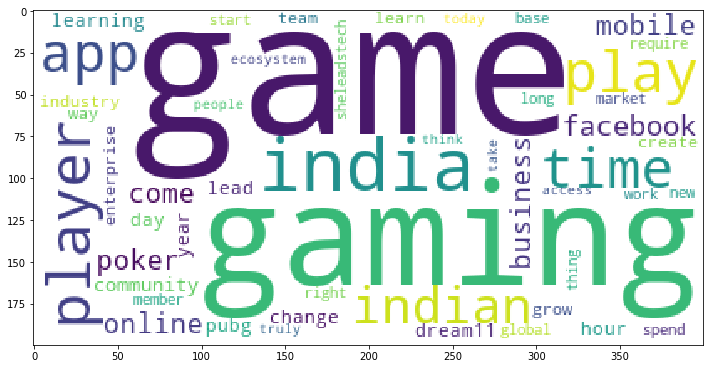

In [26]:
plt.figure(figsize=(12,14))
plt.imshow(word_cloud)
plt.show()

 ## from the above text visualisation we can see that topmost five words that are appeared frequent are listed below
 <center><b> game gaming player india app</b></center>

# Task 5
<center><b> Topic Modelling </b></center>
### Apply topic modeling LDA algorithm to each and every news article and extract 10 topics for each news article and store it into a new column corresponding to each news.

In [27]:
Lda = gensim.models.ldamodel.LdaModel

In [30]:
# This function creating the dictionary of unique words
def extractor(result):
    topic_list = []
    for element in result:
        regessor = "[a-z]+"
        text = element[1]
        topic_list.append(re.findall(regessor, text))
    dictionary = corpora.Dictionary(topic_list)
    dictionary = dictionary.token2id
    topic_list = list(dictionary.keys())[:10]
    return topic_list

In [31]:
# this function process the one article at a time
def topic_modelling(result):
    dictionary = corpora.Dictionary(result)
    bag_of_words = [dictionary.doc2bow(result[0])]
    lda_model = Lda(bag_of_words, num_topics=10, id2word = dictionary, passes=50)
    result_lda = lda_model.print_topics(num_topics=10, num_words=8)
    return extractor(result_lda)

In [32]:
# topics list is storing the extracted topics from the article
topics = []
for corpus in final_result:
    corpus = [corpus] #converting into 2d
    topics.append(topic_modelling(corpus))

In [33]:
topics

[['app',
  'game',
  'gaming',
  'india',
  'indian',
  'play',
  'player',
  'pubg',
  'time',
  'thing'],
 ['accord',
  'dream',
  'fantasy',
  'funding',
  'gaming',
  'percent',
  'raise',
  'long',
  'market',
  'match'],
 ['business',
  'enterprise',
  'game',
  'gaming',
  'lead',
  'learn',
  'learning',
  'require',
  'change',
  'create'],
 ['amit',
  'card',
  'game',
  'madoverpoker',
  'online',
  'pitti',
  'poker',
  'start',
  'mba',
  'platform'],
 ['community',
  'entrepreneur',
  'facebook',
  'member',
  'sheleadstech',
  'tool',
  'woman',
  'year',
  'event',
  'encourage'],
 ['america',
  'company',
  'confidence',
  'man',
  'number',
  'percent',
  'position',
  'woman',
  'example',
  'world'],
 ['balloon',
  'captain',
  'day',
  'founder',
  'handloom',
  'manage',
  'marvel',
  'talk',
  'beauty',
  'year'],
 ['career',
  'divide',
  'hansi',
  'india',
  'mehrotra',
  'need',
  'say',
  'woman',
  'category',
  'finance'],
 ['delivery',
  'india',
  'india

# TASK 6: - Categorizing each news article

## Categorize each story into the following ones:-

   1. Games
   2. Startup
   3. Fund
   4. Science
   5. Women

In [34]:
category = ['Games', 'Startup', 'Fund', 'Science', 'Women']

In [35]:
docx = nlp('games startup fund science women') # tokenisation of the category

In [36]:
lemmetisation = []
for i in docx:
    lemmetisation.append(i.lemma_)

In [37]:
collection = list(zip(lemmetisation,category))
collection

[('game', 'Games'),
 ('startup', 'Startup'),
 ('fund', 'Fund'),
 ('science', 'Science'),
 ('woman', 'Women')]

In [38]:
category_list = []
# here, we searched for the category name in corpus of each news article.
# and assigned the corresponding category names.
for index, story in enumerate(final_result):
    category_list.append([])
    for categ_lemma, categ_name in collection:
        if categ_lemma in story:
            category_list[index].append(categ_name)

In [39]:
category_list

[['Games'],
 ['Games', 'Fund'],
 ['Games', 'Startup'],
 ['Games'],
 ['Startup', 'Women'],
 ['Women'],
 ['Women'],
 ['Fund', 'Women'],
 ['Startup', 'Women'],
 ['Startup', 'Science'],
 ['Startup', 'Science'],
 ['Science'],
 ['Startup', 'Science'],
 ['Startup', 'Fund'],
 ['Startup', 'Fund'],
 ['Startup'],
 ['Startup'],
 ['Startup'],
 ['Startup'],
 ['Startup']]

In [40]:
categories = []
for i in category_list:
    categories.append(', '.join(i))

In [41]:
content_data['categories'] = pd.DataFrame(categories)

In [42]:
content_data.head()

,startup_news,summary,description,content,categories
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,"Earlier this month, I went to my home town in ...",How PUBG has redefined the Indian gaming ecosy...,Games
1,Dream11 closes $100 M funding led by Tencent; ...,,Sports fantasy gaming company Dream11 has rais...,Dream11 closes $100 M funding led by Tencent; ...,"Games, Fund"
2,How enterprise gaming has grown from a ridicul...,,Having spent a large part of my career in the ...,How enterprise gaming has grown from a ridicul...,"Games, Startup"
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...","A deal, bated breath, a flush, a straight hand...",These MBA grads are changing the way India loo...,Games
4,Facebook is celebrating two years of encouragi...,,"Two years ago, Facebook India launched a uniqu...",Facebook is celebrating two years of encouragi...,"Startup, Women"


# TASK 7: - Finding more insights of data

### Use NLP to find person name, location and organization name for each news article

In [62]:
cities = pd.read_csv('cities_r2.csv')

In [63]:
cities.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3.0,PUNJAB,9.0,145238.0,76840.0,68398.0,15870.0,8587.0,7283.0,...,44972.0,890.0,848.0,79.86,85.49,73.59,"30.1452928,74.1993043",16287.0,8612.0,7675.0
1,Achalpur,27.0,MAHARASHTRA,7.0,112293.0,58256.0,54037.0,11810.0,6186.0,5624.0,...,43086.0,928.0,909.0,91.99,94.77,89.00,"21.257584,77.5086754",8863.0,5269.0,3594.0
2,Adilabad,28.0,ANDHRA PRADESH,1.0,117388.0,59232.0,58156.0,13103.0,6731.0,6372.0,...,37660.0,982.0,947.0,80.51,88.18,72.73,"19.0809075,79.560344",10565.0,6797.0,3768.0
3,Adityapur,20.0,JHARKHAND,24.0,173988.0,91495.0,82493.0,23042.0,12063.0,10979.0,...,54515.0,902.0,910.0,83.46,89.98,76.23,"22.7834741,86.1576889",19225.0,12189.0,7036.0
4,Adoni,28.0,ANDHRA PRADESH,21.0,166537.0,82743.0,83794.0,18406.0,9355.0,9051.0,...,45089.0,1013.0,968.0,68.38,76.58,60.33,"15.6322227,77.2728368",11902.0,7871.0,4031.0


In [64]:
names_of_cities = cities['name_of_city'].apply(func=(lambda x:x[:-1])).tolist()
names_of_cities

['Abohar',
 'Achalpur',
 'Adilabad',
 'Adityapur',
 'Adoni',
 'Agartala',
 'Agra',
 'Ahmadabad',
 'Ahmadnagar',
 'Aizawl',
 'Ajmer',
 'Akbarpur',
 'Akola',
 'Alandur',
 'Alappuzha',
 'Aligarh',
 'Allahabad',
 'Alwar',
 'Ambala',
 'Ambala Sadar',
 'Ambarnath',
 'Ambattur',
 'Ambikapur',
 'Ambur',
 'Amravati',
 'Amreli',
 'Amritsar',
 'Amroha',
 'Anand',
 'Anantapur',
 'Anantnag',
 'Arrah',
 'Asansol',
 'Ashoknagar Kalyangarh',
 'Aurangabad',
 'Aurangabad',
 'Avadi',
 'Azamgarh',
 'Badlapur',
 'Bagaha',
 'Bagalkot',
 'Bahadurgarh',
 'Baharampur',
 'Bahraich',
 'Baidyabati',
 'Baleshwar Town',
 'Ballia',
 'Bally',
 'Bally Cit',
 'Balurghat',
 'Banda',
 'Bankura',
 'Bansberia',
 'Banswara',
 'Baran',
 'Baranagar',
 'Barasat',
 'Baraut',
 'Barddhaman',
 'Bareilly',
 'Baripada Town',
 'Barnala',
 'Barrackpur',
 'Barshi',
 'Basirhat',
 'Basti',
 'Batala',
 'Bathinda',
 'Beawar',
 'Begusarai',
 'Belgaum',
 'Bellary',
 'Bengalur',
 'Bettiah',
 'Betul',
 'Bhadrak',
 'Bhadravati',
 'Bhadreswar',


In [65]:
person_location,person_name,person_org = [],[],[]

In [69]:
# this function takes article as a input and extract the person_name, person_location and organisation
def city_extractor(string):
    global person_location, person_org, person_name, names_of_cities
    loc,per,org = [],[],[]
    tokens = nlp(string)
    for ent in tokens.ents:
        if ent.label_ =='PERSON':
            per.append(ent.text)
        elif ent.label_ == 'ORG':
            org.append(ent.text)
        elif ent.label_ == 'GPE' or (ent.text in names_of_cities): # to extract locations
            loc.append(ent.text)
    person_location.append(set(loc))
    person_org.append(set(org))
    person_name.append(set(per))

In [67]:
news_content = content_data['content'].tolist()

In [70]:
for news in news_content:
    city_extractor(news)


In [72]:
print('Names of locations\n',person_location)

Names of locations
 [{'India', 'Jaipur', 'Rajasthan', 'Bikaner'}, {'US', 'Mumbai', 'India', 'China'}, {'India'}, {'Finance', 'India'}, {'New Delhi', 'India'}, {'India', 'America'}, {'Ginjee', 'Villupuram', 'Proust Questionnaire', 'Pollachi', 'India'}, {'Unnao', 'India'}, {'India'}, {'Taco Robobricks', 'Pankaj', 'Swati Gupta', 'Tarun', 'Delhi', 'India'}, set(), {'Kuppam', 'Bengaluru', 'US', 'Agastya', 'India'}, {'Whitefield', 'Bengaluru', 'India'}, {'Hyderabad'}, set(), {'Hyderabad'}, {'Airbnb'}, {'Delhi', 'India'}, {'Chennai', 'Mumbai', 'Pune', 'Bengaluru', 'Hyderabad', 'Noida', 'India'}, {'Chennai', 'India', 'Chicago'}]


In [73]:
print('Names of organisations\n',person_org)

Names of organisations
 [{'Age of Empires', 'ET Bureau', 'AOE', 'App Annie].', 'MB', 'PUBG', 'Tencent'}, {'Frost & Sullivan', 'Disney', 'Nazara', 'IndiaGames', 'Tencent', 'Dream11'}, {'QuoDeck Technologies', 'PlayStation', 'QuoDeck'}, {'MadOverPoker', 'Indore', 'Le Chiffre'}, {'YourStory', 'FbStart', 'AMA', 'MailChimp', 'Amazon'}, {'Fortune', '’s', 'the World Economic Forum', 'McKinsey & Company', 'World Bank', 'Hewlett-Packard', 'NSE'}, {'Marvel’s', 'MCU', 'Hot Air Ballooning'}, {'EPF', 'TechSparks', 'YourStory'}, {"International Women's Day", 'YourStory'}, {'STEAM', 'Technavio', 'DIY', 'Mathematics', 'Science, Technology, Engineering', 'STEM', 'AR', 'IIT', 'CAGR', 'Robotix Learning Solutions', 'Atal Innovation Mission', 'Atal Tinkering Labs', 'Robotix', 'INVENTORS'}, {'VCS', 'Discounted Cash Flow -', 'Replacement Value', 'Corporate Marketing', 'WACC'}, {'Founding Trustees', 'Agastya International FoundationThis', 'Citibank', 'Acquisitions', 'Mergers', 'YourStory', 'AIF', 'Agastya Int